Задание 1

Модифицировать функцию Sine таким образом, чтобы можно было возвращать составной сигнал, состоящий из комбинаций sin и cos, каждая отдельная гармоническая функция в составном сигнале должна принимать свои параметры:

 A  = амплитуда сигнала
 
 f  = частота сигнала  Hz

 phi  = начальная фаза синусоиды "Радианы"

 Сделайте вариант с 2-мя и 3-мя гармоническими сигналами.

In [ ]:
import matplotlib.pyplot as plt  # для вывода графиков
from scipy.fftpack import fft # для расчета FFT
import numpy as np  # для работы с массивами данных
from scipy import signal  # отсюда будем вытаскивать фильтры
import librosa  # для параметризации аудио
import librosa.display  # для отображения аудио сигналов
import IPython.display as ipd  # для проигрывания аудио в ноутбуке
import scipy  # библиотека научных вычислений

%matplotlib inline

In [ ]:
def Sine(A, f, phi, fs, t, N):  # объявим функцию создания и дискретизации синусоиды по заданным параметрам 
    """
    Входящие аргументы:
    A = Амплитуда сигнала
    f = Частота сигнала(Герц)
    phi = Начальная фаза синусоиды(радианы)
    fs = Частота семплирования(частота взятия отсчетов или дискретизации(Герц))
    t = Продолжительность сигнала(секунды)
    N = количество отсчетов(сэмплов)

    Выходные данные:
    x(numpy array) = 
    x1(numpy array) =
    """
    n = np.arange(N) # последовательность отсчетов(сэмплов)
    x = A * np.sin(2 * np.pi * f * n * t/fs + phi)  # формула создания гармонического сигнала
    x1 = A * np.cos(2 * np.pi * f * n * t/fs + phi)  # формула создания второго гармонического сигнала
    return x, x1, n

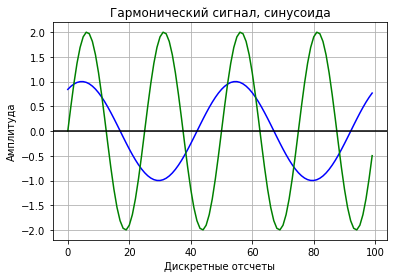

In [ ]:
A = 1  # амплитуда сигнала
f = 10  # частота сигнала, Герц
phi = 1  # начальная фаза синусоиды, рад
fs = 50  # частота семплирования(дискретизации), Герц
t = 0.1  # продолжительность сигнала, сек

# Отрисовка сигнала, созданного по заданным параметрам:
plt.plot(Sine(A, f, phi, fs, t, 100)[0], color='blue')  # строим график сигнала по заданным параметрам
plt.plot(Sine(2*A, 2*f, 0*phi, fs, t, 100)[0], color='green')  # строим график сигнала с удвоенной амплитудой и частотой, фазой в 0

plt.title('Гармонический сигнал, синусоида')  # подпись/заголовок графика
plt.xlabel('Дискретные отсчеты')  # подпись оси X
plt.ylabel('Амплитуда')  # подпись оси Y
plt.axhline(y=0, color='k')  # жирная черная линия на оси X
plt.grid()  # сетка на фон графика
plt.show()  # выводим на экран

Задание 2

Дан сигнал 3 * np.sin(2 * np.pi * 5.45 * 0.002 + 2.) Перепишите выражение таким образом, чтобы

а) амплитуда увеличилась в 2 раза,

б) фаза сигнала была в 0.

In [ ]:
6*np.sin(2 * np.pi * 5.45 * 0.002 + 2.)

In [ ]:
3*np.sin(2 * np.pi * 5.45 * 0.002 + 0.)

Задание 3

Сигнал задан следующей функцией:
t = np.linspace(0, 1, n, endpoint=True)

x = np.sin(3 * np.pi * t) + np.sin(5 * np.pi * t)

Отобразите на графике аналоговый сигнал.

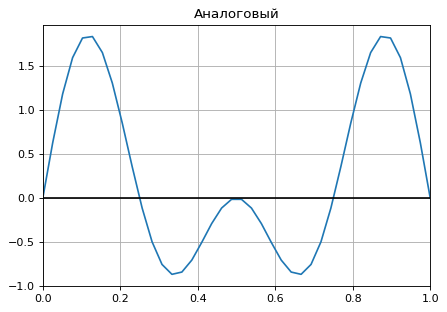

In [ ]:
N = 40  # количество дискретных отсчетов
t = np.linspace(0, 1, N, endpoint=True) # временной вектор, начальная точка = 0, конечная = 1
# График синуса
x =  np.sin(3 * np.pi * t) + np.sin(5 * np.pi * t)

# Функция построения аналогового, дискретизированного, квантованного отображения на выбор
def plt_sel(count, *args):
    if count == 0:  # если это первый график из цикла, то:
        return plt.plot(*args)  # строим аналоговое отображение
    if count == 1:  # если это второй плот из цикла, то:
        return plt.stem(*args, use_line_collection=True)  # строим дискретизированное отображение
    if count == 2:  # если это третий плот из цикла, то:
        return plt.step(*args)  # строим квантованное отображение

# Подпись подграфиков
titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Вывод графика
fig = plt.figure(figsize=(16, 4), dpi=80)
plt.subplot(1, 3, i)  # строим один график на области из трех в одну линию
plt.title(titles[0])  # присваиваем текущий заголовок из списка
plt_sel(0, t, x)  # функция вывода нужного графика
plt.xlim([0, 1])  # обрезаем ось x конкретно от 0 до 1
plt.axhline(y=0, color='k')  # жирная черная линия на оси X
plt.grid(True)  # сетка на фон

# Подстраиваем наши subplot под размеры plt.figure
plt.tight_layout()                                                    

Задание 4

Сигнал задан следующей функцией: t = np.linspace(0, 1, n, endpoint=True) 

x = np.sin(np.pi * t) + np.sin(0.1 * np.pi) 

Отобразите на графике дискретный сигнал.


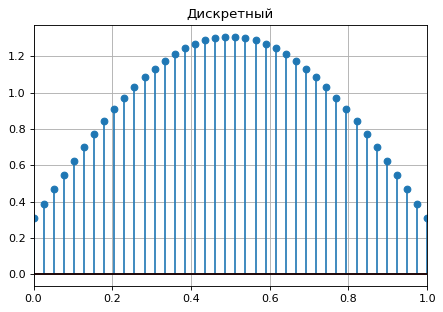

In [ ]:
N = 40  # количество дискретных отсчетов
t = np.linspace(0, 1, N, endpoint=True) # временной вектор, начальная точка = 0, конечная = 1
# График синуса
x =  np.sin(np.pi * t) + np.sin(0.1 * np.pi)

# Функция построения аналогового, дискретизированного, квантованного отображения на выбор
def plt_sel(count, *args):
    if count == 0:  # если это первый график из цикла, то:
        return plt.plot(*args)  # строим аналоговое отображение
    if count == 1:  # если это второй плот из цикла, то:
        return plt.stem(*args, use_line_collection=True)  # строим дискретизированное отображение
    if count == 2:  # если это третий плот из цикла, то:
        return plt.step(*args)  # строим квантованное отображение

# Подпись подграфиков
titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Вывод графика
fig = plt.figure(figsize=(16, 4), dpi=80)
plt.subplot(1, 3, i)  # строим один график на области из трех в одну линию
plt.title(titles[1])  # присваиваем текущий заголовок из списка
plt_sel(1, t, x)  # функция вывода нужного графика
plt.xlim([0, 1])  # обрезаем ось x конкретно от 0 до 1
plt.axhline(y=0, color='k')  # жирная черная линия на оси X
plt.grid(True)  # сетка на фон

# Подстраиваем наши subplot под размеры plt.figure
plt.tight_layout()                              

Задание 5

Сигнал задан следующей функцией: t = np.linspace(0, 1, n, endpoint=True) 

x = np.sin(3 * np.pi * t) + np.sin(5 ** t)

Отобразите на графике квантованный сигнал.

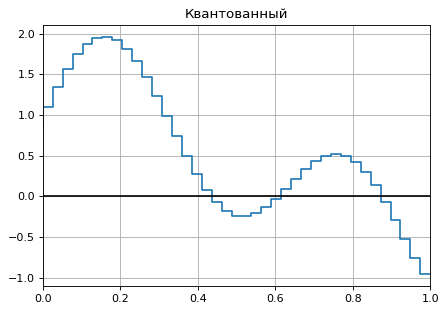

In [ ]:
N = 40  # количество дискретных отсчетов
t = np.linspace(0, 1, N, endpoint=True) # временной вектор, начальная точка = 0, конечная = 1
# График синуса
x =  np.sin(3 * np.pi * t) + np.sin(5 ** t)

# Функция построения аналогового, дискретизированного, квантованного отображения на выбор
def plt_sel(count, *args):
    if count == 0:  # если это первый график из цикла, то:
        return plt.plot(*args)  # строим аналоговое отображение
    if count == 1:  # если это второй плот из цикла, то:
        return plt.stem(*args, use_line_collection=True)  # строим дискретизированное отображение
    if count == 2:  # если это третий плот из цикла, то:
        return plt.step(*args)  # строим квантованное отображение

# Подпись подграфиков
titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Вывод графика
fig = plt.figure(figsize=(16, 4), dpi=80)
plt.subplot(1, 3, i)  # строим один график на области из трех в одну линию
plt.title(titles[2])  # присваиваем текущий заголовок из списка
plt_sel(2, t, x)  # функция вывода нужного графика
plt.xlim([0, 1])  # обрезаем ось x конкретно от 0 до 1
plt.axhline(y=0, color='k')  # жирная черная линия на оси X
plt.grid(True)  # сетка на фон

# Подстраиваем наши subplot под размеры plt.figure
plt.tight_layout()                              